Tomer's House project

In [9]:
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

(576, 576)


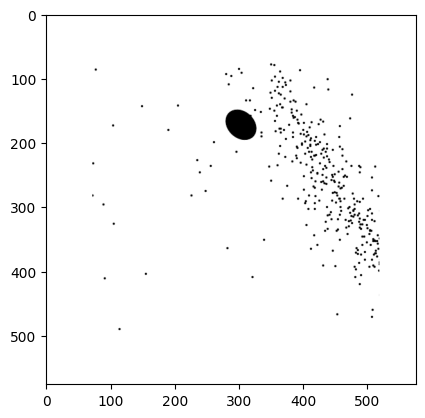

In [6]:
im = Image.open("data/line/line_00000.png")
print(im.size)
# This method will show image in any image viewer
plt.imshow(im)

In [7]:
def count_files(class_type):
    return len(glob(f'data/{class_type}/**.png'))

We can see that the classes are basicclly balanced.
<br>but on closer lock we can see there are duplicates

In [11]:
from hs_utils import removing_files
removing_files()

In [12]:
for class_type in ['line', 'parabola', 'sine']:  
    class_num = count_files(class_type)
    print(f'{class_type}: {class_num}')

line: 33
parabola: 30
sine: 28


We can see there are "blobs" in the images - some kind of noise.
<br> Lets remove them using a basic conncted components algorithm.

In [ ]:
%run basic_cnn.py